In [91]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [92]:
# Use raw string
csv_path = r"C:\Users\nikhil\Desktop\Data Science\DS Learning Projects\data\synthetic_multiple_linear_regression_dataset.csv"
df_index  = pd.read_csv(csv_path)

In [93]:
df_index.head()

,no,year,month,interest_rate,unemployment_rate,index_price
0,1,2006,1,5.51,9.95,1303.25
1,2,2019,5,8.18,3.52,2223.09
2,3,2014,1,6.85,6.88,1803.32
3,4,2010,8,7.32,9.79,872.58
4,5,2007,1,8.16,6.66,646.00


In [94]:
# drop unnassary col 
df_index.drop(columns=["no","year","month"], axis=1,inplace=True
              )

In [95]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,5.51,9.95,1303.25
1,8.18,3.52,2223.09
2,6.85,6.88,1803.32
3,7.32,9.79,872.58
4,8.16,6.66,646.00


In [96]:
## check null value : 
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

c:\Users\nikhil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nikhil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nikhil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


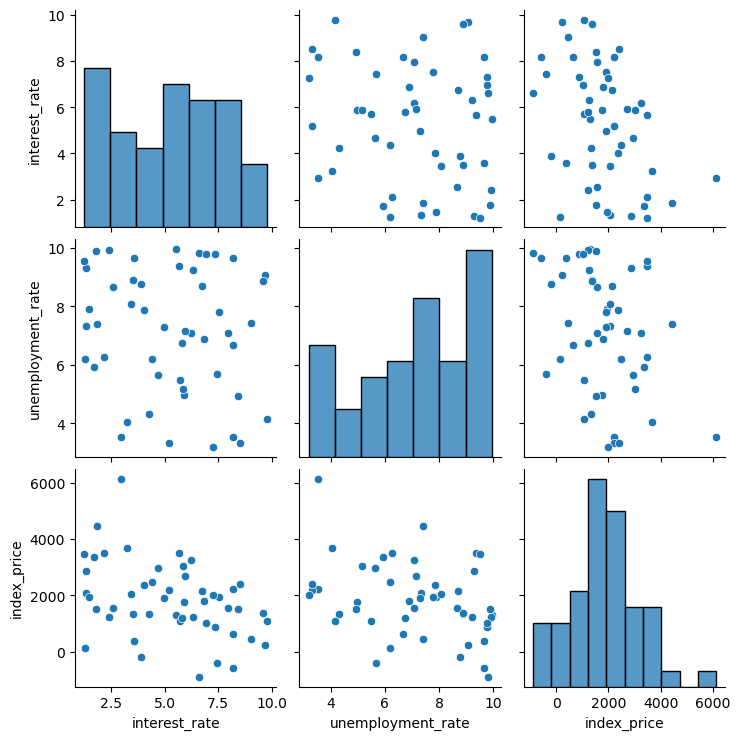

In [97]:
## visulization 


import seaborn as sns 

sns.pairplot(df_index)

In [98]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.154292,-0.402635
unemployment_rate,-0.154292,1.000000,-0.344959
index_price,-0.402635,-0.344959,1.000000


Text(0, 0.5, 'unemployment_rate')

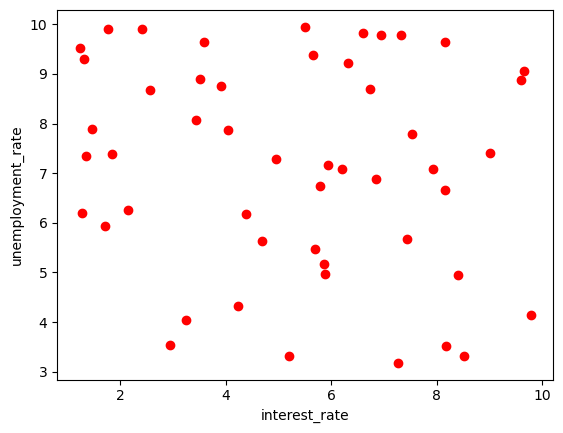

In [99]:
## visualize data point 


plt.scatter(df_index["interest_rate"] , df_index["unemployment_rate"],color = "r")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [100]:
# get my independent and dependent feature 

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1] 

In [101]:
X.head()

,interest_rate,unemployment_rate
0,5.51,9.95
1,8.18,3.52
2,6.85,6.88
3,7.32,9.79
4,8.16,6.66


In [102]:
# train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
                                                        

<Axes: xlabel='interest_rate', ylabel='index_price'>

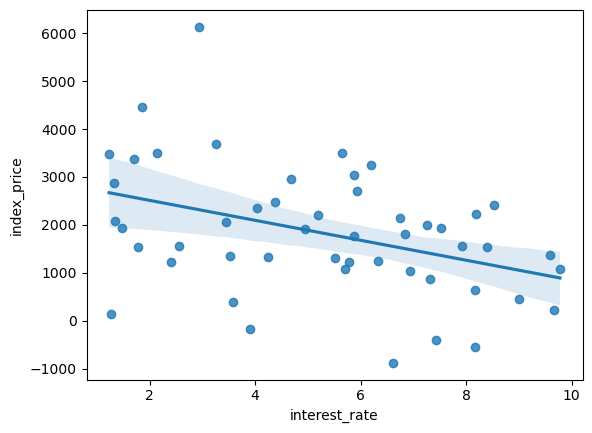

In [103]:
import seaborn as sns 
sns.regplot(x='interest_rate', y='index_price', data=df_index)


In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_train)

In [105]:
X_test

array([[-1.40652781,  0.06365446],
       [ 0.82878561,  1.19642317],
       [-0.51158515,  0.2902082 ],
       [-0.25004939, -0.76232273],
       [ 0.87373707, -0.74816312],
       [ 0.67349875,  1.19642317],
       [-1.64354459, -0.5027299 ],
       [ 0.37109803, -0.07794163],
       [-1.61493912,  0.04005511],
       [-1.43921978,  1.24834173],
       [-0.75677492,  0.38932546],
       [ 0.14634074,  1.00290851],
       [ 0.0891298 ,  1.27194108],
       [-0.83441835, -1.512782  ],
       [ 0.23624366, -0.9841566 ],
       [ 1.17205129,  1.13034499],
       [ 1.51940347,  0.0730942 ],
       [ 0.91460203,  0.25244924],
       [-0.04163808, -1.85733248],
       [-1.46373876, -0.62544651],
       [ 1.18022428, -1.76293509],
       [ 1.07806188, -0.07794163],
       [ 0.63672029, -0.17705889],
       [-1.17768403,  1.2530616 ],
       [-0.13971399,  0.01645576],
       [ 0.53864438,  1.21058278],
       [ 0.80426663, -1.92341066],
       [-1.62311211,  0.96986943],
       [-0.96109973,

In [106]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression ()


In [107]:
regression.fit(X_train,y_train)

LinearRegression()

In [108]:
from sklearn.model_selection import cross_val_score 

validation_score = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [109]:
import numpy as np 
np.mean(validation_score)

-1359943.1579480402

In [110]:
#v prediction    


# Make predictions
y_pred = regression.predict(X_test)

y_pred

array([2644.28016999,  788.76111934, 2019.09907903, 2416.57255023,
       1771.7179889 ,  876.85360722, 3072.46256011, 1709.28436483,
       2774.74812141, 2048.45025553, 2106.79052983, 1276.2606116 ,
       1169.19615713, 3137.26469274, 2255.74643177,  628.29832406,
        979.53681655, 1229.62082021, 2866.21233279, 3034.10124294,
       2124.10930742, 1308.23172264, 1610.0017972 , 1897.63624819,
       1950.10804634,  946.0118424 , 2420.60806359, 2297.18531247,
       3333.96292691, 2841.67235672,  487.71391553, 2221.72487025,
       2353.94280547, 2166.37918047, 1157.6553255 , 1190.01867792,
        424.97982478])

AssertionError: Mismatch in the number of samples between y_test and y_pred